<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroObjectDetaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Read image**

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import pathlib
import os
import tensorflow as tf

In [3]:
!wget 'https://static.vecteezy.com/system/resources/previews/002/787/924/original/cute-cat-paws-up-over-wall-cartoon-illustration-vector.jpg'

--2022-03-20 04:08:52--  https://static.vecteezy.com/system/resources/previews/002/787/924/original/cute-cat-paws-up-over-wall-cartoon-illustration-vector.jpg
Resolving static.vecteezy.com (static.vecteezy.com)... 104.18.20.35, 104.18.21.35, 2606:4700::6812:1523, ...
Connecting to static.vecteezy.com (static.vecteezy.com)|104.18.20.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64171 (63K) [image/jpeg]
Saving to: ‘cute-cat-paws-up-over-wall-cartoon-illustration-vector.jpg’

cute-cat-paws-up-ov 100%[===================>]  62.67K  --.-KB/s    in 0.01s   

2022-03-20 04:08:52 (6.20 MB/s) - ‘cute-cat-paws-up-over-wall-cartoon-illustration-vector.jpg’ saved [64171/64171]



In [4]:
img = ('/content/cute-cat-paws-up-over-wall-cartoon-illustration-vector.jpg')

image_r = plt.imread(img)

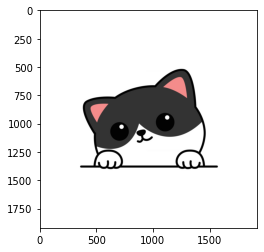

In [5]:
plt.imshow(image_r)

In [6]:
image_r.max()

255

# **Image Augmentation**

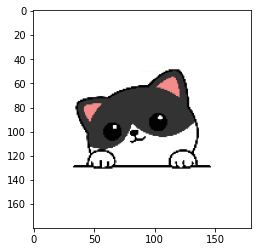

In [7]:
#Resize
img_size = 180

resize_and_rescale = tf.keras.Sequential([tf.keras.layers.Resizing(img_size, img_size),tf.keras.layers.Rescaling(1./255)])
image_re = resize_and_rescale(image_r)
_ = plt.imshow(image_re)

In [8]:
print(f"Min and max pixel values, min: {image_re.numpy().min()}, max: {image_re.numpy().max()}")

Min and max pixel values, min: 0.0005445160204544663, max: 1.0


In [12]:
image_dim = tf.expand_dims(image_re, 0)
image_dim.shape

TensorShape([1, 180, 180, 3])

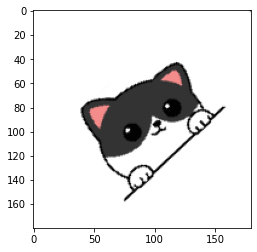

In [14]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal_and_vertical"),
                                         tf.keras.layers.RandomRotation(0.2),])

augmented_image = data_augmentation(image_dim)
plt.imshow(augmented_image[0])

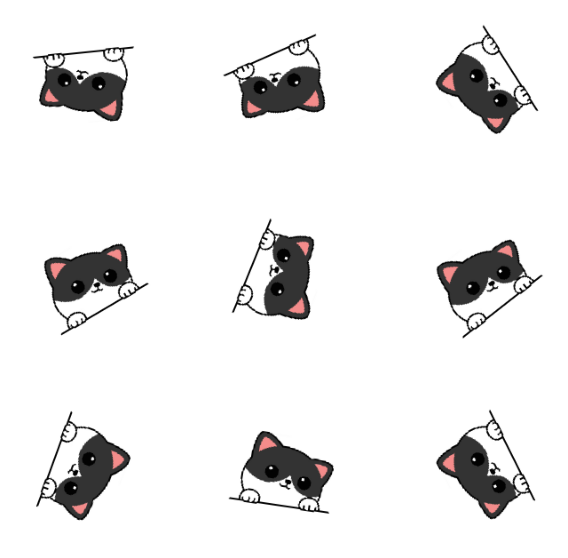

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_dim)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

# **Set Range HSV of Target**

In [38]:
#Converts image from RGB to HSV.
image_h = tf.image.rgb_to_hsv(image_r, name=None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


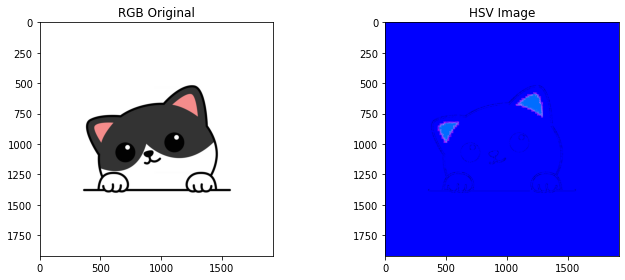

In [39]:
#Plot compare
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image_r)
ax[0].set_title("RGB Original")
ax[1].imshow(image_h, cmap=plt.cm.hsv_r)
ax[1].set_title("HSV Image")

fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


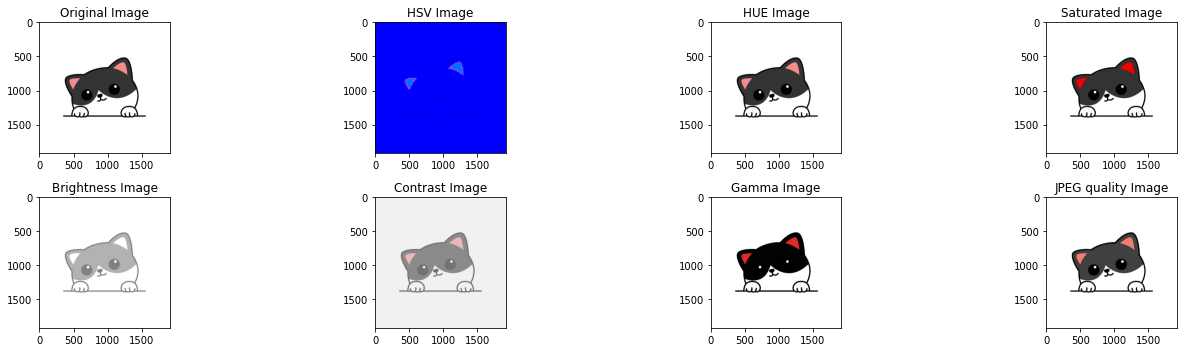

In [40]:
hue = tf.image.adjust_hue(image_r, 3)
saturated = tf.image.adjust_saturation(image_r, 3)
brightness = tf.image.adjust_brightness(image_r, 0.5)
contrast = tf.image.adjust_contrast(image_r, 0.5)
gamma = tf.image.adjust_gamma(image_r, 3)
value = tf.image.adjust_jpeg_quality(image_r, 3)

fig, ax  = plt.subplots(nrows=2,ncols=4, figsize =(20, 5))
ax[0][0].imshow(image_r)
ax[0][0].set_title('Original Image')
ax[0][1].imshow(image_h)
ax[0][1].set_title('HSV Image')
ax[0][2].imshow(hue)
ax[0][2].set_title('HUE Image')
ax[0][3].imshow(saturated)
ax[0][3].set_title('Saturated Image')
ax[1][0].imshow(brightness)
ax[1][0].set_title('Brightness Image')
ax[1][1].imshow(contrast)
ax[1][1].set_title('Contrast Image')
ax[1][2].imshow(gamma)
ax[1][2].set_title('Gamma Image')
ax[1][3].imshow(value)
ax[1][3].set_title('JPEG quality Image')

fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


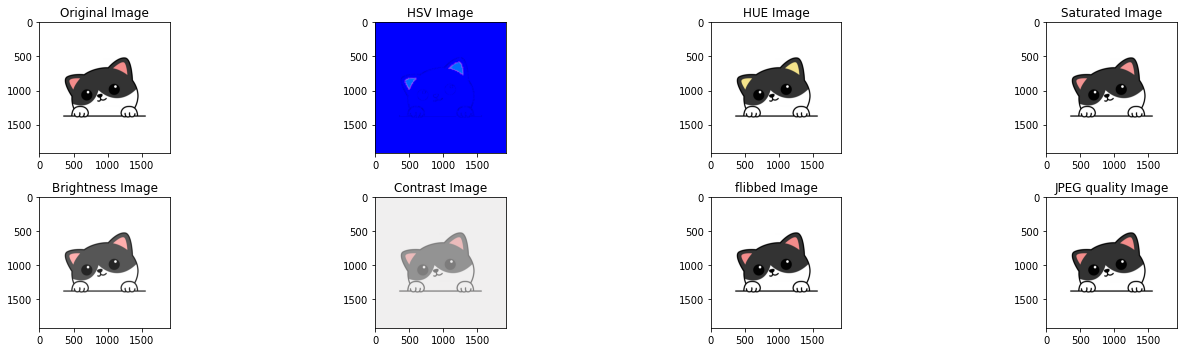

In [41]:
seed=(1,2) #random
hue = tf.image.stateless_random_hue(image_r, 0.2, seed)
saturated = tf.image.stateless_random_saturation(image_r, 0.5, 1.0, seed)
brightness = tf.image.stateless_random_brightness(image_r, 0.2, seed)
contrast = tf.image.stateless_random_contrast(image_r, 0.2, 0.5, seed)
flib = tf.image.stateless_random_flip_up_down(image_r, seed)
value = tf.image.stateless_random_jpeg_quality(image_r, 75, 95, seed)

fig, ax  = plt.subplots(nrows=2,ncols=4, figsize =(20, 5))
ax[0][0].imshow(image_r)
ax[0][0].set_title('Original Image')
ax[0][1].imshow(image_h)
ax[0][1].set_title('HSV Image')
ax[0][2].imshow(hue)
ax[0][2].set_title('HUE Image')
ax[0][3].imshow(saturated)
ax[0][3].set_title('Saturated Image')
ax[1][0].imshow(brightness)
ax[1][0].set_title('Brightness Image')
ax[1][1].imshow(contrast)
ax[1][1].set_title('Contrast Image')
ax[1][2].imshow(flib)
ax[1][2].set_title('flibbed Image')
ax[1][3].imshow(value)
ax[1][3].set_title('JPEG quality Image')

fig.tight_layout()
plt.show()

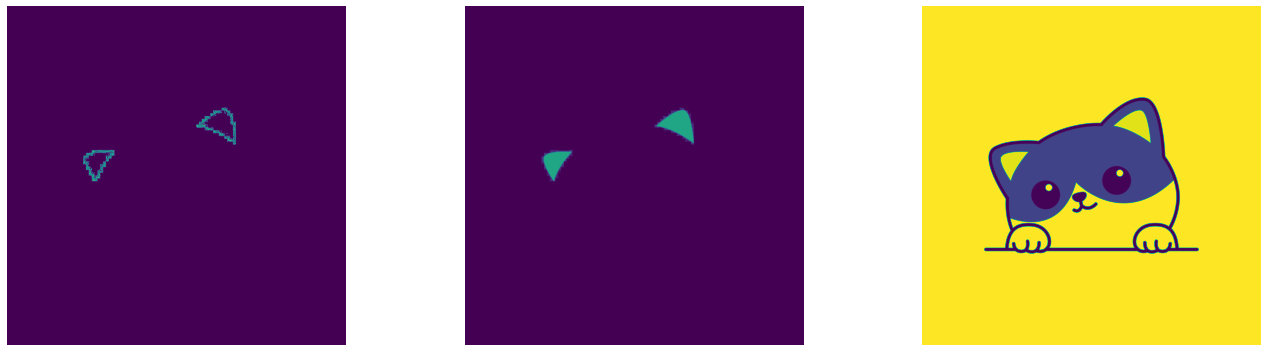

In [42]:
im_hue = image_h[:,:,0]
im_sat = image_h[:,:,1]
im_val = image_h[:,:,2]
# how to apply thershold ?

fig, ax  = plt.subplots(nrows=1,ncols=3, figsize =(20, 5))
fig.subplots_adjust(wspace=0.2)
ax[0].imshow(im_hue)
ax[0].set_axis_off()
ax[1].imshow(im_sat)
ax[1].set_axis_off()
ax[2].imshow(im_val)
ax[2].set_axis_off()

fig.tight_layout()
plt.show()

Hue: main color // H*255/360

Saturation: color purification // S*255/100

Value: Bright // V*255/100

In [ ]:
image_h.shape

TensorShape([2048, 1536, 3])

# **Image Segmentation**

In [43]:
im_hue_arr = np.array(im_hue)
im_sat_arr = np.array(im_sat)
im_val_arr = np.array(im_val)

In [46]:
from skimage import measure, filters

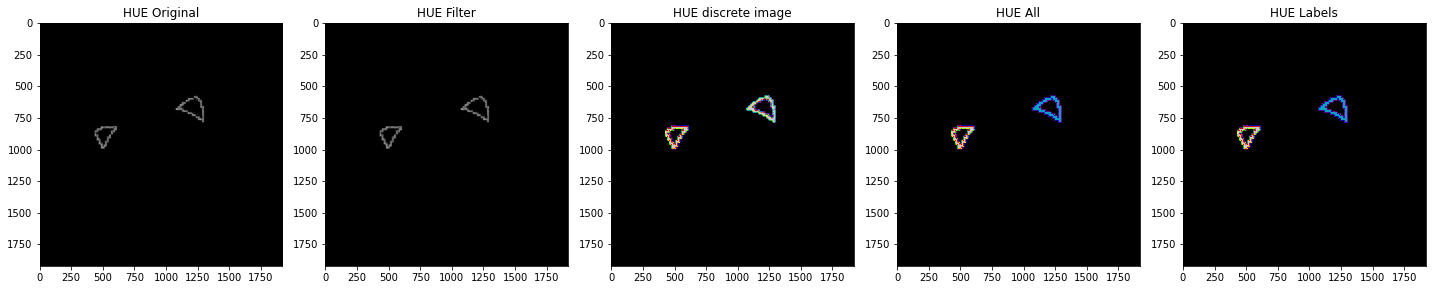

In [47]:
im = filters.gaussian(im_hue_arr, sigma=1)
blobs = im > im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

#Plot compare
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
ax = axes.ravel()

ax[0].imshow(im_hue_arr, cmap=plt.cm.gray)
ax[0].set_title("HUE Original")

ax[1].imshow(im, cmap=plt.cm.gray)
ax[1].set_title("HUE Filter")

ax[2].imshow(blobs, cmap = plt.cm.nipy_spectral)
ax[2].set_title("HUE discrete image")

ax[3].imshow(all_labels, cmap = plt.cm.nipy_spectral)
ax[3].set_title("HUE All")

ax[4].imshow(blobs_labels, cmap = plt.cm.nipy_spectral)
ax[4].set_title("HUE Labels")

fig.tight_layout()
plt.show()

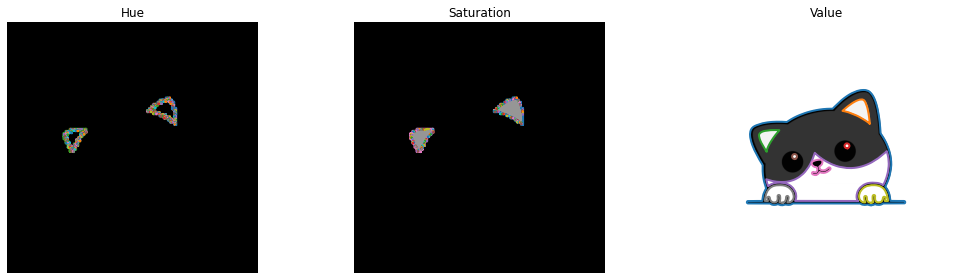

In [48]:
# Find contours at a constant value
im_hua_contours = measure.find_contours(im_hue_arr, 0.01)
im_sat_contours = measure.find_contours(im_sat_arr, 0.01)
im_val_contours = measure.find_contours(im_val_arr, 200)

# Display the image and plot all contours found
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].imshow(im_hue_arr, cmap=plt.cm.gray)
axes[1].imshow(im_sat_arr, cmap=plt.cm.gray)
axes[2].imshow(im_val_arr, cmap=plt.cm.gray)

for im_hua_contour in im_hua_contours:
    axes[0].plot(im_hua_contour[:, 1], im_hua_contour[:, 0], linewidth=2)

axes[0].set_axis_off()
axes[0].set_title("Hue")

for im_sat_contour in im_sat_contours:
    axes[1].plot(im_sat_contour[:, 1], im_sat_contour[:, 0], linewidth=2)

axes[1].set_axis_off()
axes[1].set_title("Saturation")

for im_val_contour in im_val_contours:
    axes[2].plot(im_val_contour[:, 1], im_val_contour[:, 0], linewidth=2)

axes[2].set_axis_off()
axes[2].set_title("Value")


fig.tight_layout()
plt.show()

In [49]:
from scipy import ndimage
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import segmentation

In [50]:
im_hue_arrd = im_hue_arr.astype('int64')

In [51]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
distance = ndimage.distance_transform_edt(im_hue_arrd)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=im_hue_arrd)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=im_hue_arrd)

# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~im_hue_arrd] = -1
labels_rw = segmentation.random_walker(im_hue_arrd, markers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  """
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: All unlabeled pixels are isolated, they could not be determined by the random walker algorithm.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


In [52]:
# compute the size and perimeter of the two segmented regions
properties = measure.regionprops(labels_rw)

for prop in properties :
  print(prop.area)
for prop in properties :
  print(prop.perimeter)

In [53]:
for prop in properties :
  prop.area

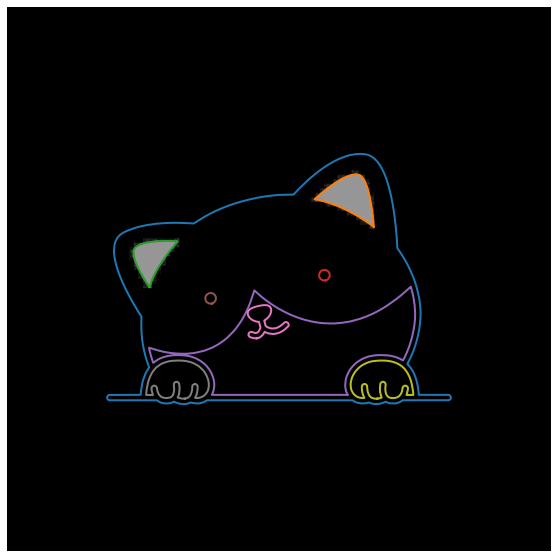

In [57]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(im_val_arr, 200)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(im_sat_arr, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

# **Gray colour and range of thresholds**

In [58]:
#Converts image from RGB to Gray.
image_g = tf.image.rgb_to_grayscale(image_r, name=None)
image_g = np.array(image_g)
print(image_g.shape)

(1920, 1920, 1)


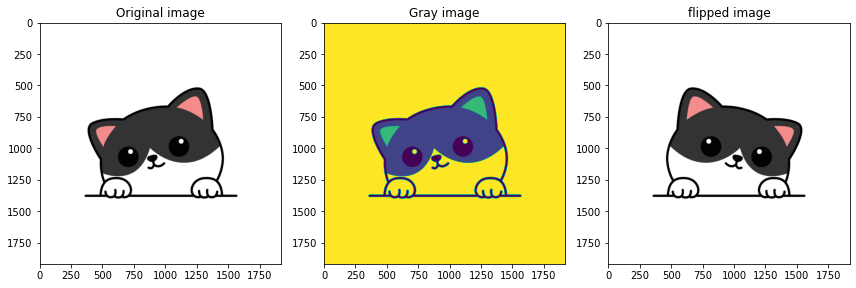

In [59]:
flipped = tf.image.flip_left_right(image_r)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].set_title('Original image')
axes[0].imshow(image_r)

axes[1].set_title('Gray image')
axes[1].imshow(tf.squeeze(image_g))

axes[2].set_title('flipped image')
axes[2].imshow(tf.squeeze(flipped))

fig.tight_layout()
plt.show()

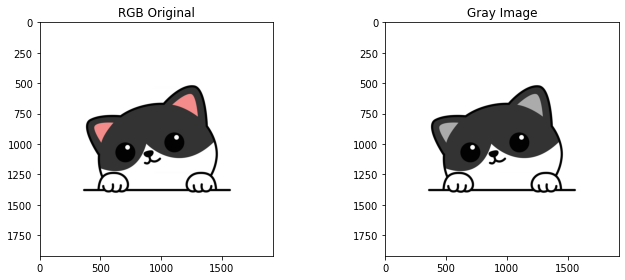

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(image_r)
axes[0].set_title("RGB Original")
axes[1].imshow(image_g[:,:,0], cmap=plt.cm.gray)
axes[1].set_title("Gray Image")

fig.tight_layout()
plt.show()

In [61]:
image_gray = image_g[:,:,0]/image_g.max()
image_gray.max()

1.0

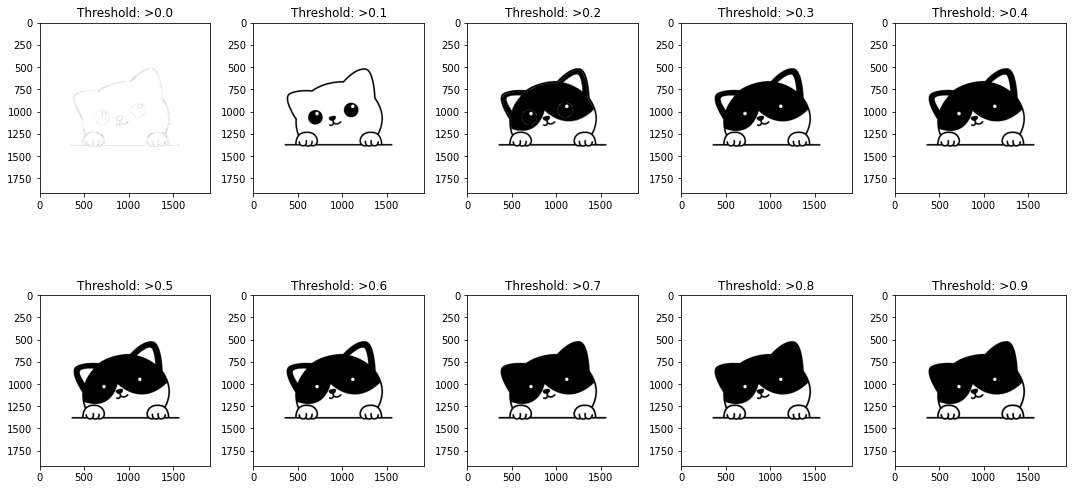

In [62]:
plt.figure(figsize=(15, 8))
 
for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (image_gray > i*0.1)*1
  plt.subplot(2,5,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap=plt.cm.gray)
   
plt.tight_layout()

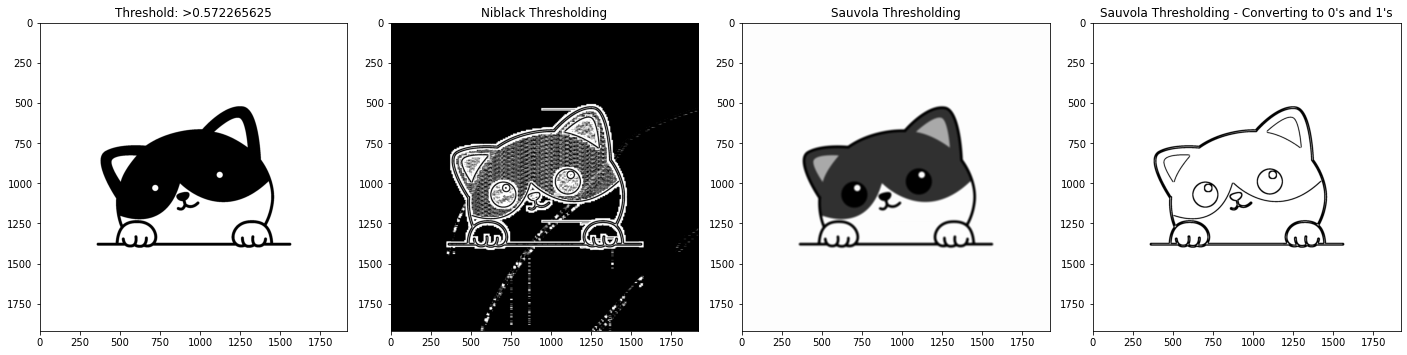

In [63]:
# Importing necessary libraries
from skimage import filters

# plot
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

threshold = filters.threshold_otsu(image_gray) # Computing Otsu's thresholding value
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[0].set_title("Threshold: >"+str(threshold))
axes[0].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_niblack(image_gray) #Computing Ni black's local pixel #threshold values for every pixel
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[1].set_title("Niblack Thresholding")
axes[1].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_sauvola(image_gray) # Computing Sauvola's local pixel threshold # values for every pixel - Not Binarized
axes[2].set_title("Sauvola Thresholding")
axes[2].imshow(threshold, cmap=plt.cm.gray)

binarized_gray = (image_gray > threshold)*1 # Computing Sauvola's local pixel # threshold values for every pixel - Binarized
axes[3].set_title("Sauvola Thresholding - Converting to 0's and 1's")
axes[3].imshow(binarized_gray, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


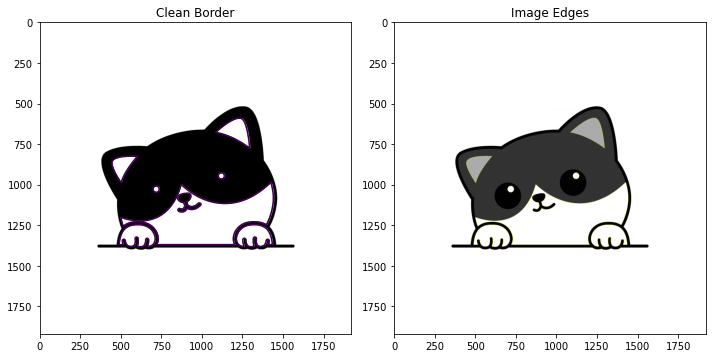

In [64]:
threshold = filters.threshold_otsu(image_gray) # Computing Otsu's thresholding value
binarized_gray = (image_gray > threshold)*1 

clean_border = segmentation.clear_border(binarized_gray) #Clean

im_edges = segmentation.mark_boundaries(image_gray, clean_border.astype(np.int)) #Image Edges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title('Clean Border')
axes[0].imshow(binarized_gray, cmap=plt.cm.gray)
axes[0].contour(clean_border, [0.5]) 

axes[1].set_title('Image Edges')
axes[1].imshow(im_edges)

fig.tight_layout()
plt.show()

In [65]:
# Importing necessary libraries
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Applying Gaussian Filter to remove noise
image_gray_noiseless = gaussian(image_gray, sigma=1, mode='reflect')

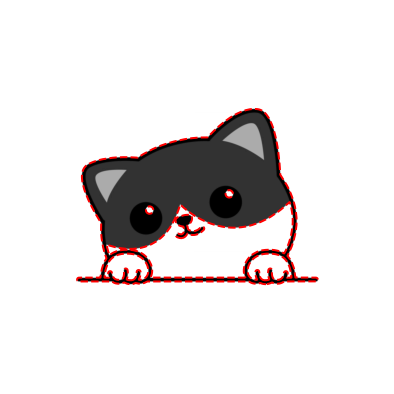

In [66]:
# Find contours at a constant value
contours = measure.find_contours(image_gray_noiseless, 0.7)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(image_gray_noiseless, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], 'r--',linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

# ***Object Detection***

In [161]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.8.0
The following GPU devices are available: 


In [158]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [156]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [159]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Image downloaded to /tmp/tmpb6j1f6n1.jpg.


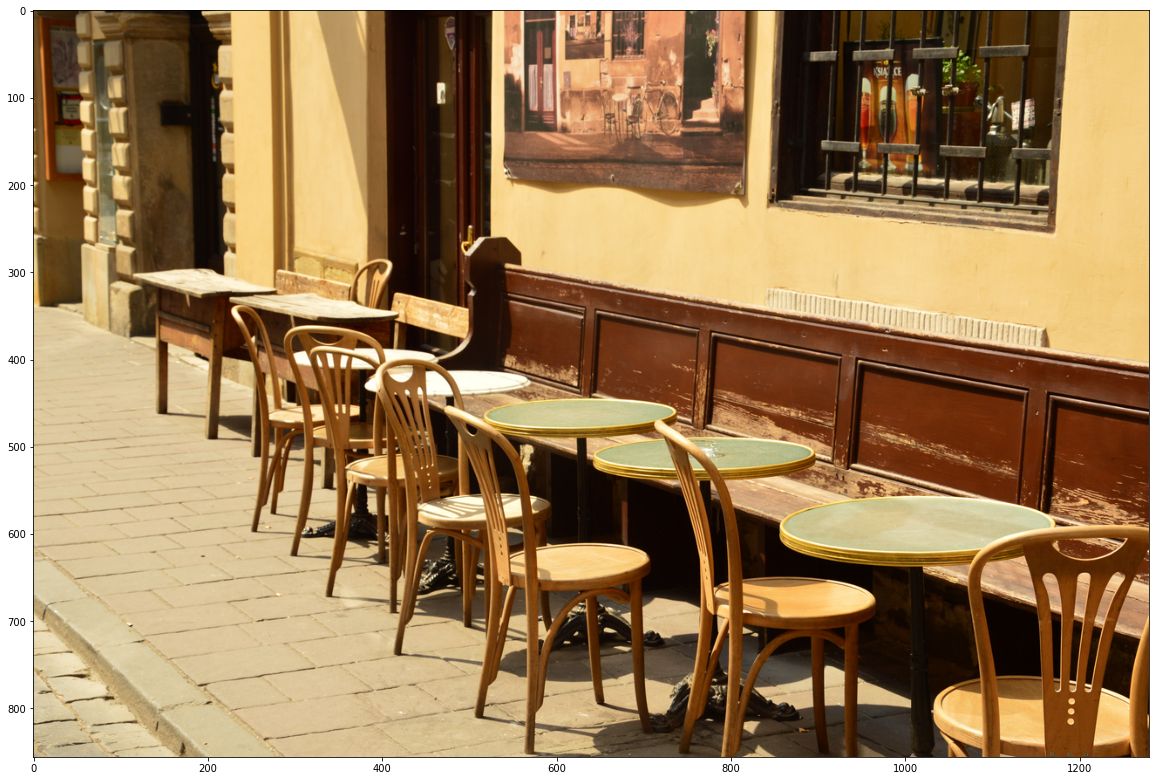

In [168]:
image_url = "https://pixy.org/src/472/4721795.jpg" 
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

Found 100 objects.
Inference time:  35.487316608428955


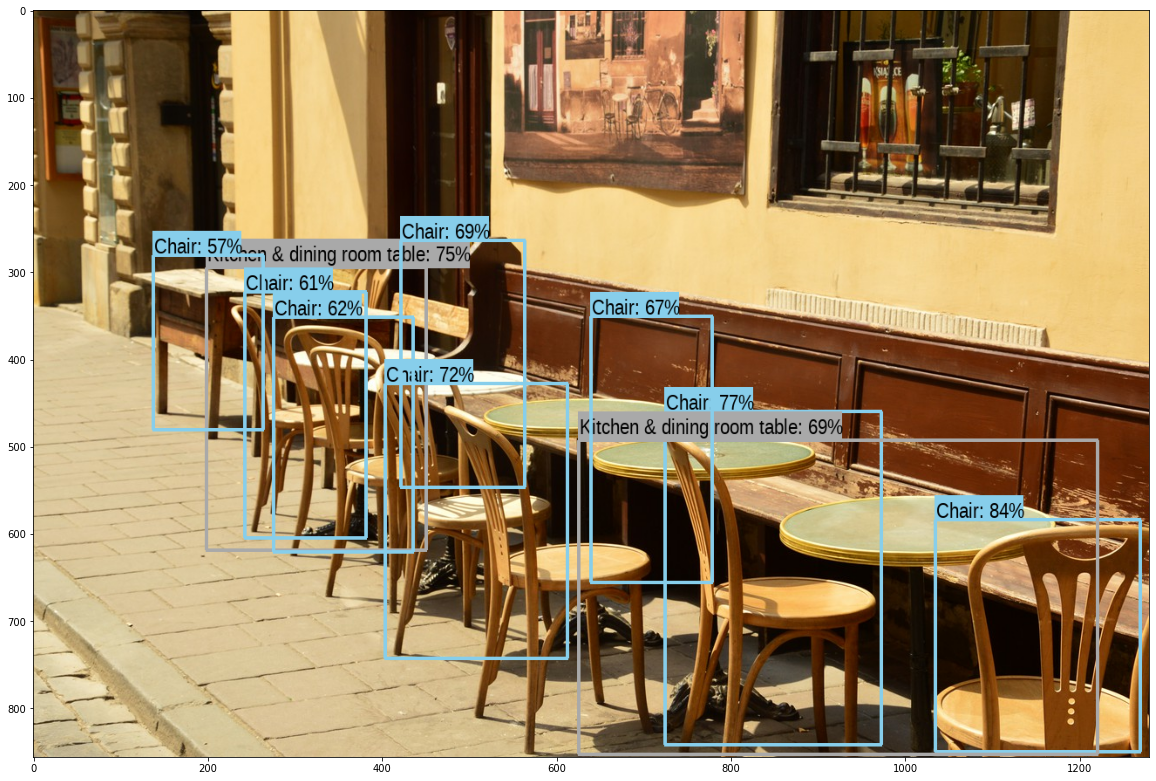

In [169]:
run_detector(detector, downloaded_image_path)

Image downloaded to /tmp/tmpt8wjmccs.jpg.
Found 100 objects.
Inference time:  44.42675971984863


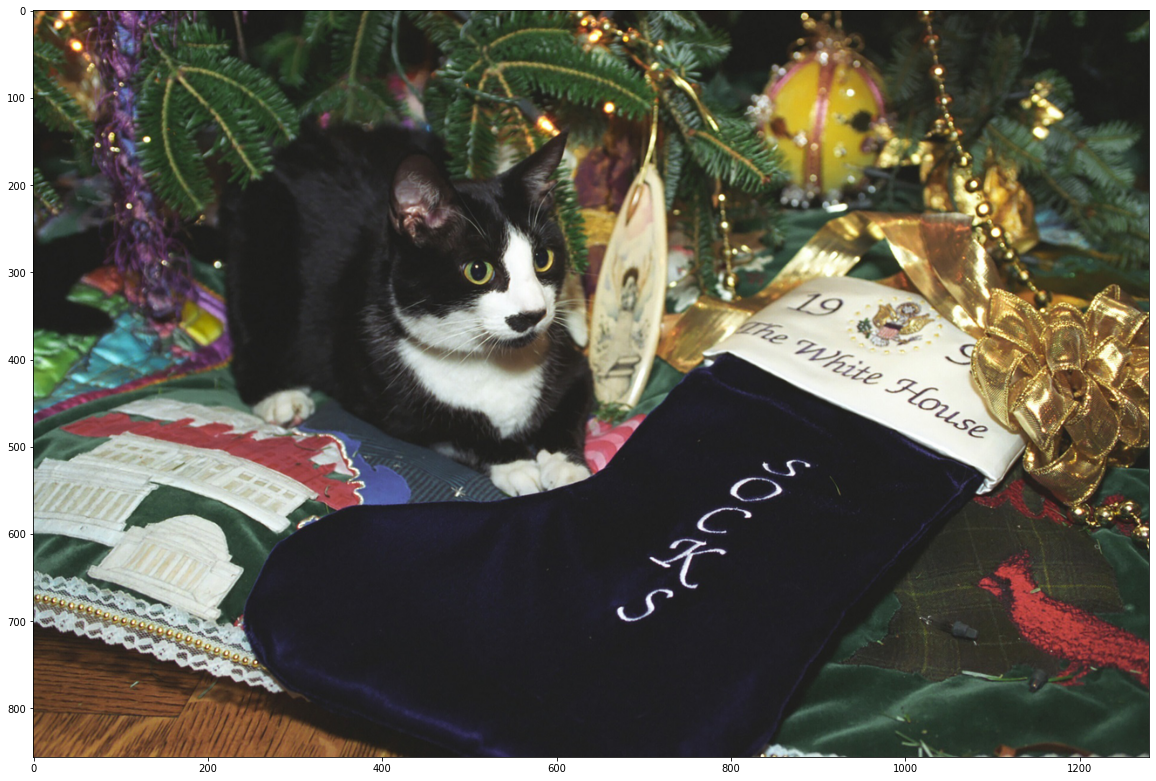

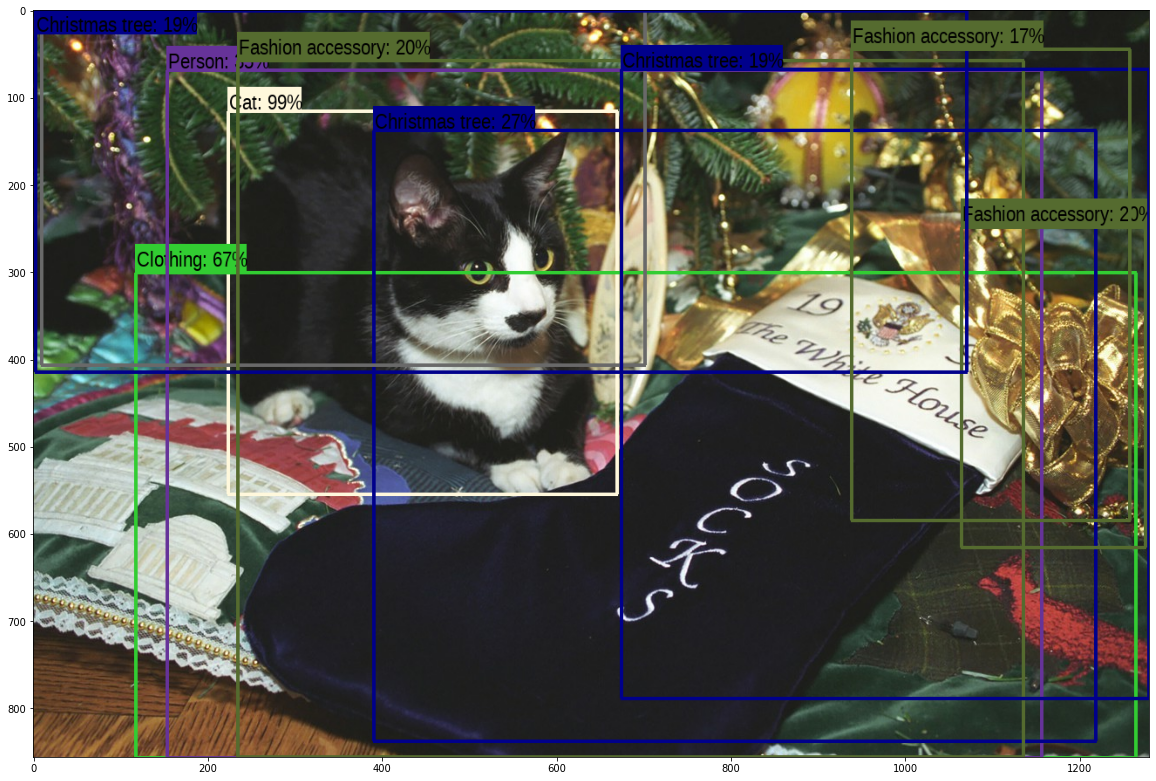

In [167]:
image_url = 'https://pixy.org/src2/603/6037446.jpg'#"https://pixy.org/src/466/4662852.jpg" 
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)
run_detector(detector, downloaded_image_path)